In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [579]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/stethography vs r-r values/3000-4000.csv")

In [580]:
df.head(1000)

,stethography,rrvalues
0,-1.8346,0.748
1,-0.1081,0.750
2,1.4173,0.726
3,1.2552,0.710
4,-0.5017,0.719
...,...,...
995,-0.8694,0.717
996,0.9602,0.695
997,1.7676,0.668
998,1.2598,0.664


In [581]:
df.describe()

,stethography,rrvalues
count,1000.000000,1000.000000
mean,0.121041,0.710353
std,1.107806,0.051583
min,-2.279900,0.593000
25%,-0.917250,0.674750
50%,0.161600,0.712000
75%,1.191900,0.740000
max,2.346500,1.387000


In [582]:
df.shape


(1000, 2)

In [583]:
cdf = df[['stethography','rrvalues']]
cdf.head(5)

,stethography,rrvalues
0,-1.8346,0.748
1,-0.1081,0.750
2,1.4173,0.726
3,1.2552,0.710
4,-0.5017,0.719


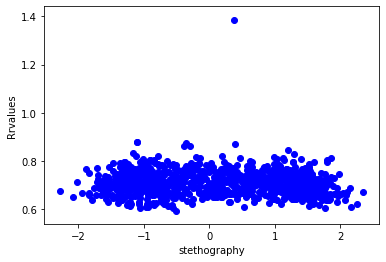

In [584]:
#graph of SNO vs r-r values

plt.scatter(cdf.stethography, cdf.rrvalues,color='blue')
plt.xlabel('stethography')
plt.ylabel('Rrvalues')
plt.show()

In [585]:
#splitting our data in 80-20 ratio for regression

In [586]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

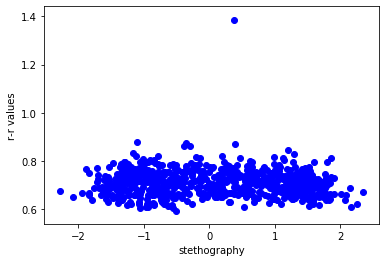

In [587]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.xlabel("stethography")
plt.ylabel("r-r values")
plt.show()

In [588]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00198254]]
Intercept:  [0.71013358]


Text(0, 0.5, 'r-r values')

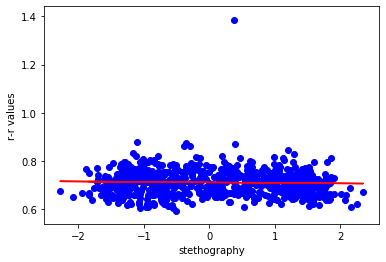

In [589]:
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("stethography")
plt.ylabel("r-r values")

In [590]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -371.59


In [591]:
#using polynomial regression

In [592]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.8346    ,  3.36575716],
       [ 1.        , -0.1081    ,  0.01168561],
       [ 1.        ,  1.2552    ,  1.57552704],
       ...,
       [ 1.        ,  1.7676    ,  3.12440976],
       [ 1.        ,  1.2598    ,  1.58709604],
       [ 1.        , -0.3295    ,  0.10857025]])

In [593]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00013707 -0.0094164 ]]
Intercept:  [0.72125049]


Text(0, 0.5, 'r-rvalues')

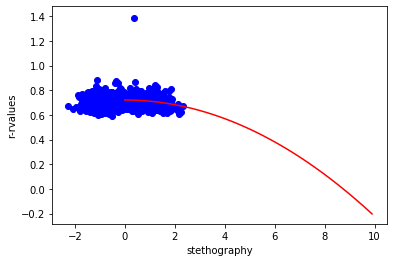

In [594]:
#plotting the polynomial regression
plt.scatter(train.stethography, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("stethography")
plt.ylabel("r-rvalues")

In [595]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -18.77
